<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ARIMA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pmdarima

In [47]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [48]:
!head airline_passengers.csv

"Month","Passengers"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136


In [49]:
df = pd.read_csv("airline_passengers.csv",index_col = 'Month')

In [50]:
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [51]:
df['LogPassengers'] = np.log(df['Passengers'])

In [52]:
NTest = 12

train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

In [53]:
import pmdarima as pm

In [54]:
model = pm.auto_arima(
    train['Passengers'],
    trace = True,
    suppress_warinings=True,
    seasonal = True, m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.97 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=1.51 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=1.76 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.61 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=1.13 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AI

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 07 Nov 2023   AIC                            905.686
Time:                                    10:27:46   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)

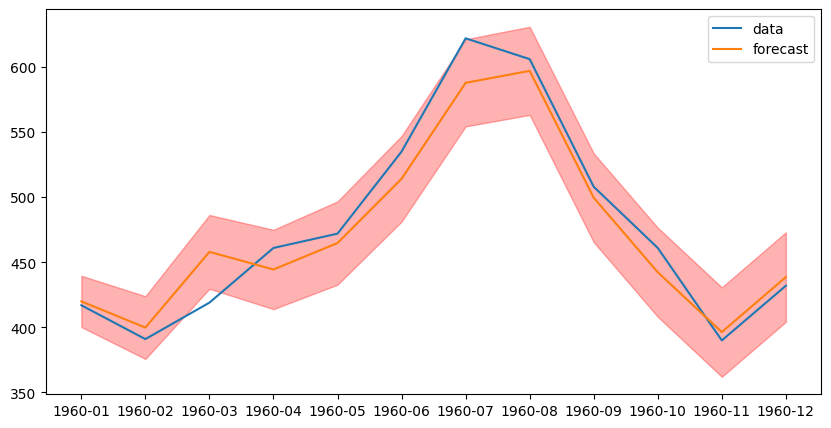

In [57]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['Passengers'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],
                color = 'red',alpha = 0.3)
ax.legend()

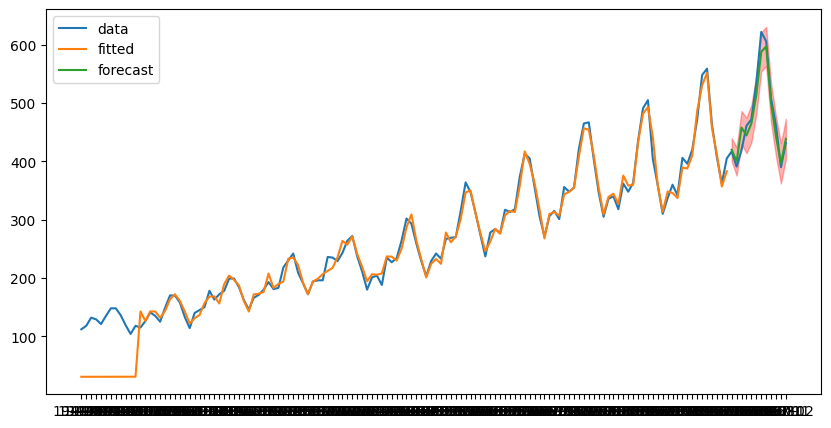

In [58]:
train_pred = model.predict_in_sample(start=0,end=-1)

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['Passengers'],label = 'data')
ax.plot(train.index,train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)
ax.legend();

In [59]:
logmodel = pm.auto_arima(train['LogPassengers'],
                         trace = True,
                         suppress_warning = True,
                         seasonal = True,m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.293, Time=2.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=1.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.09 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=5.52 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=2.32 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=6.21 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=3.48 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.571, Time=1.73 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.44 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-443.041, Time=1.99 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.327, Time=5.03 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [60]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Tue, 07 Nov 2023   AIC                           -448.052
Time:                                      10:29:12   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0194      0.009      2.164      0.030       0.002       0.037
ar.L1          0.5992      0.083      7.251      0.000       0.437       0.761
ar.L2          0.2418      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.413      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.188      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.13
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

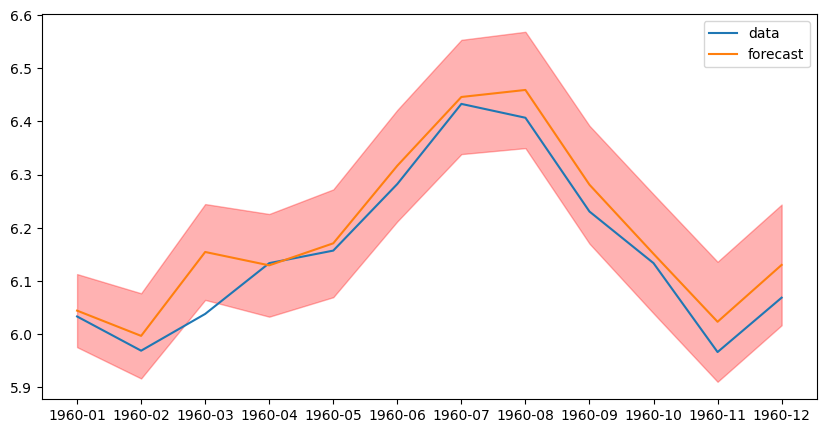

In [61]:
test_pred_log,confint = logmodel.predict(
    n_periods=NTest, return_conf_int = True
)

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogPassengers'],label = 'data')
ax.plot(test.index,test_pred_log,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],\
                color = 'red',alpha = 0.3)
ax.legend();

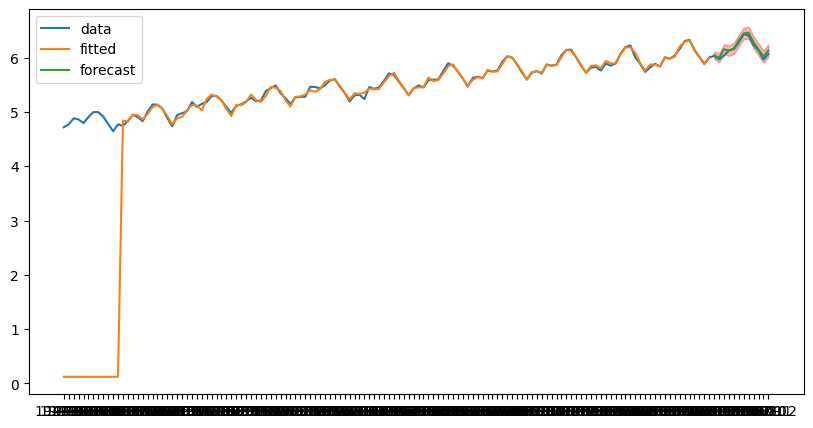

In [62]:
train_pred_log = logmodel.predict_in_sample(start = 0,end = -1)

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogPassengers'],label = 'data')
ax.plot(train.index,train_pred_log,label = 'fitted')
ax.plot(test.index,test_pred_log,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend()

In [63]:
#Forecast RMSE
def rmse(t,y):
  return np.sqrt( np.mean( (t-y)**2 ) )

In [92]:
from sklearn.metrics import mean_squared_error

In [99]:
print("Non-logged RMSE: ", np.sqrt( mean_squared_error(test['Passengers'],test_pred) ))
print("Logged RMSE    : ", np.sqrt( mean_squared_error(test['Passengers'], np.exp(test_pred_log) ) ))

Non-logged RMSE:  18.536468798006823
Logged RMSE    :  23.06076576973839


In [100]:
###NON-SEASONAL
#The max sum of p,q and r is 14
#max-p -> the max value of p
#max-q -> the max value of q
model = pm.auto_arima(train['LogPassengers'],
                      trace = True,
                      suppress_warnings = True,
                      max_p = 12,max_q = 2,max_order = 14,
                      stepwise = True,
                      seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.454
Date:                Tue, 07 Nov 2023   AIC                           -250.908
Time:                        10:59:59   BIC                           -227.907
Sample:                    01-01-1949   HQIC                          -241.562
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0103      0.002      5.505      0.000       0.007       0.014
ar.L1          0.0346      0.123      0.281      0.779      -0.207       0.276
ar.L2          0.4641      0.117      3.957      0.000       0.234       0.694
ar.L3         -0.2468      0.099     -2.498      0.012      -0.440      -0.053
ar.L4         -0.2486      0.105     -2.375      0.018      -0.454      -0.043
ma.L1         -0.0472      0.081     -0.582      0.560      -0.206       0.112
ma.L2         -0.8653      0.079    -10.927      0.000      -1.021      -0.710
sigma2         0.0075      0.001      5.543      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.84
Prob(Q):                              0.98   Prob(JB):                         0.05
Heteroskedasticity (H):               1.04   Skew:                             0.23
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

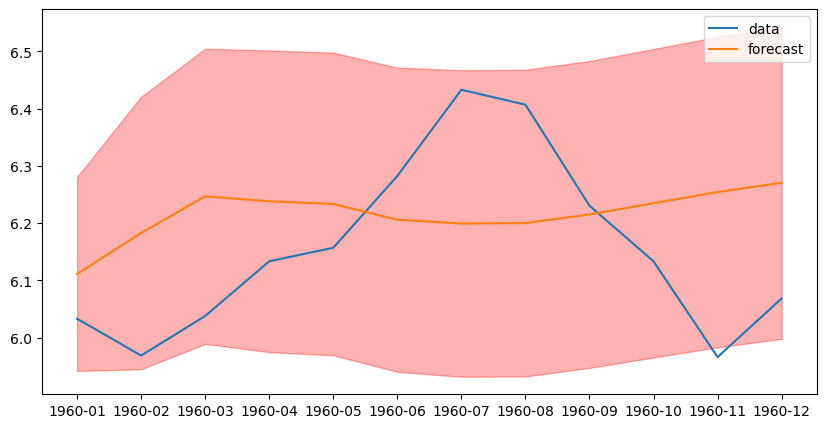

In [104]:
test_pred,confint = model.predict(n_periods = NTest,return_conf_int = True)
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogPassengers'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend();

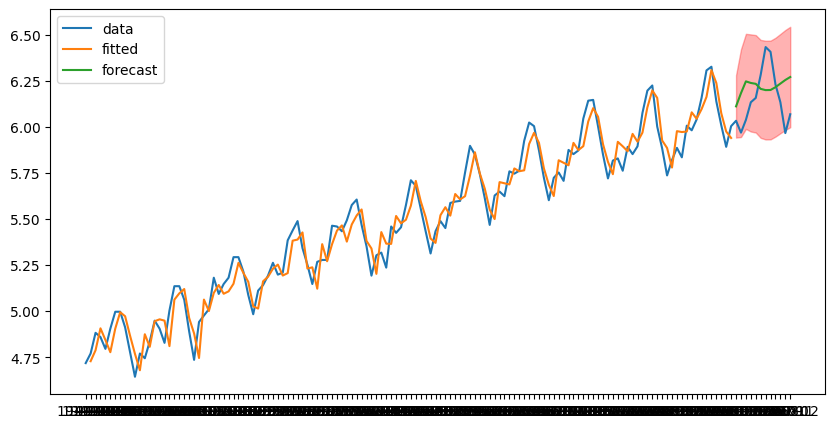

In [108]:
train_pred = model.predict_in_sample(start = 1,end = -1)

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogPassengers'],label = 'data')
ax.plot(train.index[1:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)
ax.legend()

In [110]:
print("Non-seasonal ARIMA Log RMSE Test : ", np.sqrt( mean_squared_error(test['Passengers'],np.exp(test_pred)) )  )

Non-seasonal ARIMA Log RMSE Test :  83.30339723653303


In [111]:
model_stepwise_false = pm.auto_arima(train['LogPassengers'],
                      trace = True,
                      suppress_warnings = True,
                      max_p = 12,max_q = 2,max_order = 14,
                      stepwise = False,
                      seasonal = False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.300, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.908, Time=1.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

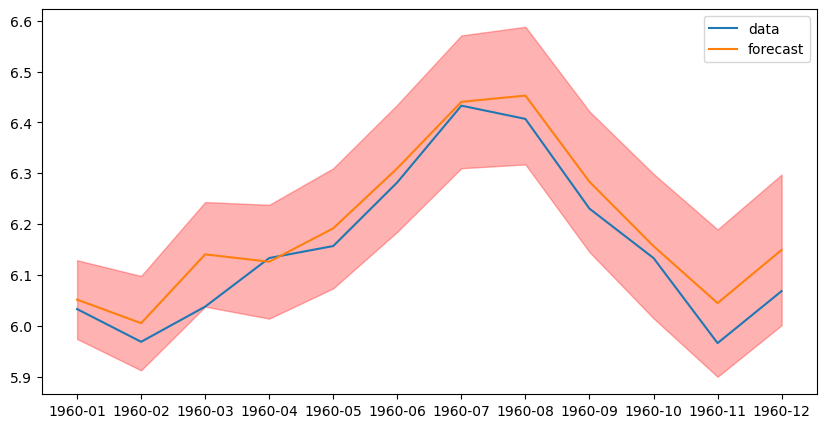

In [112]:
test_pred,confint = model_stepwise_false.predict(n_periods = NTest,return_conf_int = True)
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(test.index,test['LogPassengers'],label = 'data')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)

ax.legend();

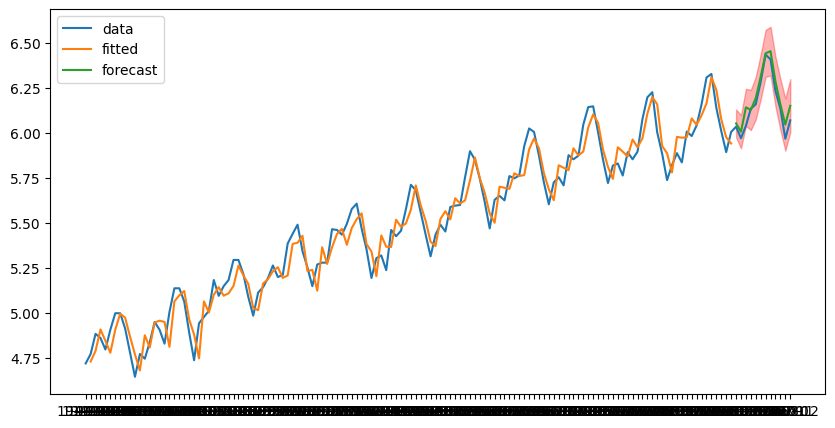

In [113]:
train_pred = model.predict_in_sample(start = 1,end = -1)

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(df.index,df['LogPassengers'],label = 'data')
ax.plot(train.index[1:],train_pred,label = 'fitted')
ax.plot(test.index,test_pred,label = 'forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1], \
                color = 'red',alpha = 0.3)
ax.legend()

In [114]:
print("Non-seasonal ARIMA Log RMSE Test with stepwise = False : ", np.sqrt( mean_squared_error(test['Passengers'],np.exp(test_pred)) )  )

Non-seasonal ARIMA Log RMSE Test with stepwise = False :  23.97614585443519
